## BigQuery Data Analysis Tutorial

In this tutorial, we'll do some exploratory data analysis using [BigQuery](https://cloud.google.com/bigquery/), a service offered by the Google Cloud Platform (GCP). If you haven't already, you may sign-up for the [free GCP trial credit](https://cloud.google.com/free/docs/frequently-asked-questions). [Before you begin](https://cloud.google.com/bigquery/quickstart-web-ui#before-you-begin), give this project any name you like and enable the BigQuery API. 

Optionally, you may also [set-up](https://cloud.google.com/datalab/docs/quickstarts) [Datalab](https://cloud.google.com/datalab/) to create a Jupyter notebook. To download your notebook, go to Notebook > Download in Datalab.

We'll analyze BigQuery's public dataset on the NYC yellow taxi ride. All the queries below are in standard SQL.

### 1. What is the most common pick-up time?

In [18]:
%%bq query --name pickup_time
  WITH mytable AS (
  SELECT
    EXTRACT(HOUR
    FROM
      pickup_datetime) AS hour
  FROM
    `nyc-tlc.yellow.trips`)
SELECT
  Hour,
  COUNT(Hour) AS Count
FROM
  mytable
GROUP BY
  Hour
ORDER BY
  Count DESC

Let's name this query *pickup_time* and reference it to create the chart below.

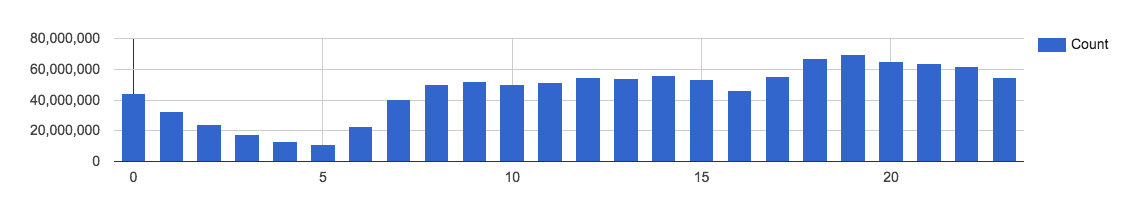

In [20]:
# Let's visualize the pick-up time distribution
%chart columns --data pickup_time

### 2. Give the vendor distribution.

In [17]:
%%bq query
SELECT
  vendor_id,
  COUNT(vendor_id) AS count
FROM
  `nyc-tlc.yellow.trips`
GROUP BY
  vendor_id
ORDER BY
  Count DESC

vendor_id,count
VTS,554054305
CMT,540747212
DDS,13977946


### 3. Provide summary statistics on trip distance.

In [9]:
%%bq query
SELECT
  MIN(trip_distance) AS min,
  AVG(trip_distance) AS avg,
  MAX(trip_distance) AS max,
  STDDEV(trip_distance) AS std_dev
FROM
  `nyc-tlc.yellow.trips`

min,avg,max,stdev
-40840124.4,5.10838742509,59016609.3,5114.54193218


## Clean-up

To avoid incurring charges to your GCP account, don't forget to [delete your Datalab VM instance](https://cloud.google.com/datalab/docs/quickstarts#clean-up).

## Reference
1. [BigQuery standard SQL query list](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators)
2. [Datalab command list](http://googledatalab.github.io/pydatalab/google.datalab%20Commands.html)
3. [How to integrate BigQuery with Datalab and Pandas?](https://cloud.google.com/bigquery/docs/visualize-datalab)